# Murder Accountability Project: Homicide <a id="title-1"></a>

##### Index <a id="index"></a>
1. <a href="#business-understanding">Business Understanding</a>
2. <a href="#data-meaning">Data Meaning</a>
3. <a href="#data-quality">Data Quality</a>
4. <a href="#new-feature-creation">New Feature Creation</a>
5. <a href="#simple-statistics">Simple Statistics</a>
6. <a href="#visualizations">Visualizations</a>
7. <a href="#exploratory-data-analysis">Exploratory Data Analysis</a>
8. <a href="#discoveries">Discoveries</a>
9. <a href="#exceptional-work">Exeptional Work</a>

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 1. Business Understanding <a id="business-understanding">
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

### 1.1 Purpose <a id='purpose'></a> 
<div style="text-align: right"> <a href="#business-understaning">Business Understanding</a> </div>
Describe the purpose of the data set you selected (i.e., why was this data collected in
the first place?). 

### 1.2 Data Mining <a id='data-mining'></a>
<div style="text-align: right"> <a href="#business-understaning">Business Understanding</a> </div>
Describe how you would define and measure the outcomes from the
dataset. That is, why is this data important and how do you know if you have mined
useful knowledge from the dataset? 

### 1.3 Algorithm Effectiveness <a id='algorithm-effectiveness'></a>
<div style="text-align: right"> <a href="#business-understaning">Business Understanding</a> </div>
How would you measure the effectiveness of a
good prediction algorithm? Be specific.

In [1]:
# IMPORT LIBRARIES
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# all imported libraries used for analysis
import numpy as np
import pandas as pd 
import os 
import urllib
import copy
import plotly 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
import plotly.graph_objects as go
import plotly.express as px
import statsmodels.api as sm
import random
import random

from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from datetime import datetime
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

# set color scheme and style for seaborn
sns.set(color_codes=True)
sns.set_style('whitegrid')

In [2]:
# READ IN THE DATAFRAME
df=pd.read_csv('../Data/database.csv')

## 2. Data Meaning Type <a id='data-meaning'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

In [3]:
# print the number of records and columns
records = len(df)
attributes = df.columns
print(f'No. of Records: {records} \nNo. of Attributes: {len(attributes)}')

No. of Records: 638454 
No. of Attributes: 24


In [4]:
df_description = pd.read_excel('../Data/data_description.xlsx')
pd.set_option('display.max_colwidth', 0)
df_types = pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index().rename(columns={'index': 'Attributes'})
df_description = pd.merge(df_description, df_types, on='Attributes', how='inner')
df_description

,Attributes,Description,Data Type
0,Record ID,"Unique record identifier generated by MAP based upon the YEAR, MONTH, INCIDENT and ORI code in the report.",int64
1,Agency Code,Unique Agency identifier.,object
2,Agency Name,The alphanumeric variable describing the name of the law enforcement agency making the report.,object
3,Agency Type,The type of law enforcement agency making the report. (e.g. Sheriff),object
4,City,Alphanumeric variable describing the original FBI naming and abbreviating scheme for the city of the reporting agency.,object
5,State,Alphanumeric variable describing the original FBI naming and abbreviating scheme for the state of the reporting agency.,object
6,Year,Year of homicide (or when victim’s body was recovered.) Numeric four digit. (F4.0).,int64
7,Month,The month of homicide occurrence or when the victim’s body was recovered.,object
8,Incident,A three-digit number describing the case number within the month in which a homicide occurred.,int64
9,Crime Type,"An alphanumeric variable defining whether the report was ""Murder or Nonnegligent manslaughter” or “Manslaughter by Negligence.”",object


## 3. Data Quality <a id='data-quality'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

### 3.1 Missing Data <a id='missing-data'></a>
<div style="text-align: right"> <a href="#data-quality">Data Quality</a> </div>
All missing data is categorized at 'unknown' or another designated category (e.g. 998 for age) prior to the data load. As noted in the data meaning above, the missing data generally indicates that the perpetrator or victim is unknown at the time of the homicide reporting.
<br><br>
Indicated in the output below, there are no columns with null values.

In [5]:
# check for nulls and put into a dataframe
df_null = pd.DataFrame(df.isnull().sum(), columns=['null_count'])

# filter on null counts that are not 0
df_null.loc[df_null['null_count'] != 0]

,null_count


While no nulls were present, the data has ' ' as a value, which is replaced with 998 to indicate unknown. Considering that there is only one record which matches this criteria, it is concluded to be a data entry error.

In [6]:
blank_index = df.loc[df['Perpetrator Age']== ' '].index.values[0]
df.at[blank_index, 'Perpetrator Age'] = '998'

Another caveat discovered is when the perpetrator's age is 0, the translation to a child under the age of 1 commiting homicide has little credibility. When filtering for records matching the scenario, majority return the remainder of the perpetrator's demographics as unknown. This indicates that the age of the perpetrator is likely unknown, rather than below one year of age.

In [7]:
df.loc[df['Perpetrator Age']== '0'].head(1)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
622595,622596,TX22012,Fort Worth,Municipal Police,Tarrant,Texas,2012,December,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0,FBI


In [8]:
# df['Perpetrator Age']=df['Perpetrator Age'].replace(to_replace=0,value=df['Perpetrator Age'].median())

### 3.2 Duplicate Data <a id='duplicate-data'></a>
<div style="text-align: right"> <a href="#data-quality">Data Quality</a> </div>
Although duplicates are not present in the dataset (table below), it should be noted that perpetrators that collected more than one victim would also have a unqiue record. This indicates that the count of records will produce the accurate number of victims, rather than the sum of additional victims in addition to the number of observations.

In [9]:
# check for rows containing duplicate data and clean-up duplicate rows
df_duplicates = df.groupby(df.columns.tolist(),as_index=False).size()

# Filter on duplicates > 1
df_duplicates.loc[df_duplicates['size'] > 1]

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source,size


### 3.1 Outlier Data <a id='outlier-data'></a>
<div style="text-align: right"> <a href="#data-quality">Data Quality</a> </div>

## 4. New Feature Creation <a id='new-feature-creation'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>
Due to the vast number of categories per variable, the attributes were further bucketed into more general groups to reduce complexity. 

1. Bucketing the age groups
2. Combining race and ethnicity
3. Combine city and state
4. Combine month and year
5. Binning relationships

In [10]:
# binning age
age_bins = np.array([0,10,20,30,40,50,60,70,80,90,100,998])
age_labels = ['0-10', '11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90', '91-100', '998']
df["Victim_Age_Group"] = pd.cut(df['Victim Age'].astype(int), age_bins, labels=age_labels, include_lowest=True)
df['Perpetrator_Age_Group'] = pd.cut(df['Perpetrator Age'].astype(int), age_bins, labels=age_labels, include_lowest=True)

In [11]:
# combine Victim and Perpetrator Race & Ethnicity into new features - Victim_Race_Ethnicity and Perpetrator_Race_Ethnicity
df['Victim_Race_Ethnicity'] = df['Victim Race'] + ', ' + df['Victim Ethnicity']
df['Perpetrator_Race_Ethnicity'] = df['Perpetrator Race'] + ', ' + df['Perpetrator Ethnicity']

In [12]:
# combine City and State into a new feature - City_State
df['City_State'] = df['City'] + ', ' + df['State']

# combine Month and Year into a new feature - Month_Year
df['Month_Year'] = pd.to_datetime(df['Year'].astype(str)  + df['Month'], format='%Y%B')


In [13]:
relationship_dict = {
    'Female Partner': ['Wife', 'Girlfriend', 'Ex-Wife', 'Common-Law Wife'],
    'Male Partner': ['Ex-Husband', 'Husband','Boyfriend', 'Common-Law Husband'],
    'Parent': ['Father','In-Law','Mother','Stepfather','Stepmother'],
    'Children': ['Daughter', 'Son', 'Stepdaughter','Stepson'],
    'Sibling': ['Brother', 'Sister'],
    'Work': ['Employee', 'Employer']
}
df['Relationship_Group'] = df['Relationship']
rel_replace = [[key for key, value in relationship_dict.items() if val in value][0] if len([key for key, value in relationship_dict.items() if val in value]) >0 else val for val in df['Relationship_Group']]
df['Relationship_Group'] = rel_replace


In [20]:
df.head(3)

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Count,Perpetrator Count,Record Source,Victim_Age_Group,Perpetrator_Age_Group,Victim_Race_Ethnicity,Perpetrator_Race_Ethnicity,City_State,Month_Year,Relationship_Group
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,0,0,FBI,11-20,11-20,"Native American/Alaska Native, Unknown","Native American/Alaska Native, Unknown","Anchorage, Alaska",1980-01-01,Acquaintance
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,0,0,FBI,41-50,41-50,"White, Unknown","White, Unknown","Anchorage, Alaska",1980-03-01,Acquaintance
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,0,0,FBI,21-30,0-10,"Native American/Alaska Native, Unknown","Unknown, Unknown","Anchorage, Alaska",1980-03-01,Unknown


### 4.1 Data Wrangling <a id='data-wrangling'></a>
<div style="text-align: right"> <a href="#new-feature-creation">New Feature Creation</a> </div>

In [43]:
# data wrangling, clean-up, rename headers, drop columns, change data types, and transforms
# change crime solved values - Yes = 1 and No = 0 
df['Crime Solved']=df['Crime Solved'].replace(to_replace='No',value=0)
df['Crime Solved']=df['Crime Solved'].replace(to_replace='Yes',value=1)

### 4.2 Dummy Code <a id='dummy-code'></a>
<div style="text-align: right"><a href="#new-feature-creation">New Feature Creation</a></div>
<hr/>

## 5. Simple Statistics <a id='simple-statistics'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

### 5.1 Continuous Attributes <a id=continuous-attributes></a>
<div style="text-align: right"> <a href="#simple-statistics">Simple Statistics</a> </div>

In [15]:
# count, mean, standard deviation, minimum and maximum values and the quantities for continuous variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Record ID,638454.0,319227.500000,184305.938720,1.0,159614.25,319227.5,478840.75,638454.0
Year,638454.0,1995.801102,9.927693,1980.0,1987.00,1995.0,2004.00,2014.0
Incident,638454.0,22.967924,92.149821,0.0,1.00,2.0,10.00,999.0
Victim Age,638454.0,35.033512,41.628306,0.0,22.00,30.0,42.00,998.0
Victim Count,638454.0,0.123334,0.537733,0.0,0.00,0.0,0.00,10.0
Perpetrator Count,638454.0,0.185224,0.585496,0.0,0.00,0.0,0.00,10.0


Text(0.5, 1, 'Correlation Between Numerical Variables')

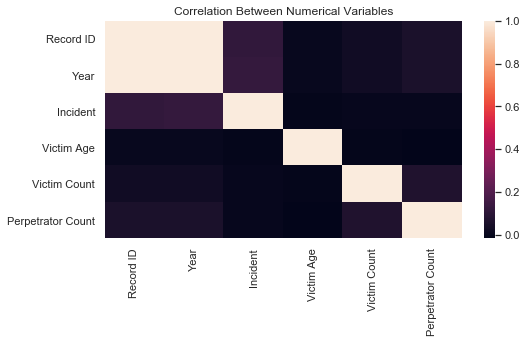

In [21]:
# Correclation plot
plt.figure(figsize=(8,4))
sns.heatmap(df.corr())
plt.title('Correlation Between Numerical Variables')

### 5.2 Categorical Attributes <a id=categorical-attributes></a>
<div style="text-align: right"> <a href="#simple-statistics">Simple Statistics</a> </div>

In [17]:
# basic statistics for categorical features
df_categorical = df.select_dtypes(include='object')
df_categorical.describe()

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,...,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source,Victim_Race_Ethnicity,Perpetrator_Race_Ethnicity,City_State,Relationship_Group
count,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,...,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454
unique,12003,9216,7,1782,51,12,2,2,3,5,...,191,5,3,28,16,2,15,15,3042,13
top,NY03030,New York,Municipal Police,Los Angeles,California,July,Murder or Manslaughter,Yes,Male,White,...,0,White,Unknown,Unknown,Handgun,FBI,"Black, Unknown","Unknown, Unknown","Los Angeles, California",Unknown
freq,38416,38416,493026,44511,99783,58696,629338,448172,494125,317422,...,211079,218243,446410,273013,317484,616647,197713,195478,44511,273013


In [ ]:
# get all levels per categorical attribute
df_categorical_levels = pd.DataFrame()
df_categorical_levels['Attribute'] = df_categorical.columns
df_categorical_levels['Levels'] = ''
df_categorical_levels['Levels_Count'] = ''
df_categorical_levels['Unknown_Count'] = ''

# populate the dataframe with categorical levels and count of each category
for i, row in df_categorical_levels.iterrows():
    attribute = row['Attribute']
    df_categorical_levels.at[i,'Levels'] = df[attribute].unique()
    df_categorical_levels.at[i,'Levels_Count'] = len(df[attribute].unique())
    try:
        df_categorical_levels.at[i,'Unknown_Count'] = df.groupby(attribute).count().loc['Unknown'][0]
    except: 
        df_categorical_levels.at[i,'Unknown_Count'] = 0
        

In [19]:
# show the dataframe
df_categorical_levels.sort_values(by='Unknown_Count', ascending = False).head()

,Attribute,Levels,Levels_Count,Unknown_Count
14,Perpetrator Ethnicity,"[Unknown, Not Hispanic, Hispanic]",3,446410
10,Victim Ethnicity,"[Unknown, Not Hispanic, Hispanic]",3,368303
21,Relationship_Group,"[Acquaintance, Unknown, Female Partner, Stranger, Male Partner, Sibling, Children, Friend, Family, Neighbor, Parent, Boyfriend/Girlfriend, Work]",13,273013
15,Relationship,"[Acquaintance, Unknown, Wife, Stranger, Girlfriend, Ex-Husband, Brother, Stepdaughter, Husband, Sister, Friend, Family, Neighbor, Father, In-Law, Son, Ex-Wife, Boyfriend, Mother, Common-Law Husband, Common-Law Wife, Stepfather, Stepson, Stepmother, Daughter, Boyfriend/Girlfriend, Employer, Employee]",28,273013
13,Perpetrator Race,"[Native American/Alaska Native, White, Unknown, Black, Asian/Pacific Islander]",5,196047


## 6. Visualizations <a id='visualizations'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

In [50]:
df['Perpetrator_age_range'] = pd.cut(df['Perpetrator Age'].astype(int),[0,20,30,45,1e6],3,
                                     labels=['Age(0-20)','Age(21-30)','Age(31-45)','Age 45+'])
ct_Perpetrator_age_range = pd.crosstab(df.Perpetrator_age_range,
           df['Perpetrator Sex'],
           
           normalize=True).round(4)*100


# ct_Perpetrator_age_range.plot(kind='barh',
#                              stacked=True,
#                              )
# plt.xlabel('Percentage of Total Homicides')
# plt.ylabel('Perpetrator Age Range')
# plt.title('Age and Sex of Perpetrators')
state_office = df[['Perpetrator Sex', 'Perpetrator_age_range', 'Record ID']].dropna().groupby(['Perpetrator Sex', 'Perpetrator_age_range']).agg({'Record ID': 'count'})
# state_office = df.groupby(['state', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
state_pcts = state_office.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
state_pcts
# fig = px.bar(df, x=ct_Perpetrator_age_range['Female']+ct_Perpetrator_age_range['Male'], 
#              y=ct_Perpetrator_age_range.index, orientation='h', color='')
# fig.show()

Record ID
Perpetrator Sex Perpetrator_age_range           
Female          Age(0-20)              14.688006
                Age(21-30)             36.248922
                Age(31-45)             34.381375
                Age 45+                14.681697
Male            Age(0-20)              23.411515
                Age(21-30)             37.407242
                Age(31-45)             26.553855
                Age 45+                12.627388
Unknown         Age(0-20)              23.027375
                Age(21-30)             36.553945
                Age(31-45)             14.009662
                Age 45+                26.409018

## 7. Exploratory Data Analysis <a id='exploratory-data-analysis'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

## 8. Discoveries <a id='discoveries'></a>
<div style="text-align: right"> <a href="#index">index</a> </div>
<hr/>

## 9. Exceptional Work <a id='exceptional-work'></a>
<div style="text-align: right"><a href="#index">index</a></div>
<hr/>

### 9.1 Downsampling the Data <a id='downsampling-data'><a/>
<div style="text-align: right"> <a href="#exceptional-work">Exceptional Work</a> </div>

### 9.2 PCA <a id='pca'><a/>
<div style="text-align: right"> <a href="#exceptional-work">Exceptional Work</a> </div>

### 9.3 Feature Selection <a id='feature-selection'><a/>
<div style="text-align: right"> <a href="#exceptional-work">Exceptional Work</a> </div>

### 9.4 Logistic Regression <a id='logistic-regression'><a/>
<div style="text-align: right"> <a href="#exceptional-work">Exceptional Work</a> </div>